# LIBRARIES IMPORT

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# IMAGE FUNCTIONS

### LINE

In [2]:
def line_im(input,rec, height=100, width=100):

    x1=np.random.randint(0, width-1)
    x2=np.random.randint(0, width-1)
    y1=np.random.randint(0, height-1)
    y2=np.random.randint(0, height-1)
    thickness=np.random.randint(1, 3)
    
    image = np.zeros((height, width), dtype=np.uint8)
    cv2.line(image, (x1, y1), (x2, y2), color=255, thickness=thickness)
        
    input[rec]['image']=image
    input[rec]['label']=1

    return input

### CIRCLE

In [3]:
def circle_im(input,rec,height=100, width=100):
    
    thickness=np.random.randint(1, 2)
    x= np.random.randint(int(0+width*0.3), int(width - width*0.3))
    y=np.random.randint(int(0+height*0.3), int(height-height*0.3))
    radio = np.random.randint(12, 17)
    
    image = np.zeros((height, width), dtype=np.uint8)
    
    cv2.circle(image, (x,y), radio, color=255, thickness=thickness)
    
    input[rec]['image']=image
    input[rec]['label']=0

    return input

### Data Generator

In [4]:
def data_gen(height, wide,n,typ):

    input={typ + str(ii):{} for ii in range(n)}

    for R in input.keys():

        input_c=input.copy()
        n_rdm=np.random.rand()

        if n_rdm>=0.5:input=line_im(input_c,R,height, wide)
        else:input=circle_im(input_c,R,height, wide)

    return input


# DATA GENERATOR

In [5]:
#input_d

height, wide = 100, 100
n_recs_train,n_recs_eval=1000,200

input_d=data_gen(height, wide,n_recs_train,'I')
eval_d=data_gen(height, wide,n_recs_eval,'I')



In [6]:
print('RECORD - LABEL - SHAPE')
for R in input_d.keys():
    print(R,input_d[R]['label'],np.shape(input_d[R]['image']),type(input_d[R]['image']))

RECORD - LABEL - SHAPE
I0 0 (100, 100) <class 'numpy.ndarray'>
I1 1 (100, 100) <class 'numpy.ndarray'>
I2 0 (100, 100) <class 'numpy.ndarray'>
I3 1 (100, 100) <class 'numpy.ndarray'>
I4 0 (100, 100) <class 'numpy.ndarray'>
I5 1 (100, 100) <class 'numpy.ndarray'>
I6 0 (100, 100) <class 'numpy.ndarray'>
I7 1 (100, 100) <class 'numpy.ndarray'>
I8 1 (100, 100) <class 'numpy.ndarray'>
I9 1 (100, 100) <class 'numpy.ndarray'>
I10 1 (100, 100) <class 'numpy.ndarray'>
I11 0 (100, 100) <class 'numpy.ndarray'>
I12 0 (100, 100) <class 'numpy.ndarray'>
I13 0 (100, 100) <class 'numpy.ndarray'>
I14 0 (100, 100) <class 'numpy.ndarray'>
I15 0 (100, 100) <class 'numpy.ndarray'>
I16 1 (100, 100) <class 'numpy.ndarray'>
I17 0 (100, 100) <class 'numpy.ndarray'>
I18 0 (100, 100) <class 'numpy.ndarray'>
I19 1 (100, 100) <class 'numpy.ndarray'>
I20 0 (100, 100) <class 'numpy.ndarray'>
I21 1 (100, 100) <class 'numpy.ndarray'>
I22 1 (100, 100) <class 'numpy.ndarray'>
I23 1 (100, 100) <class 'numpy.ndarray'>
I24

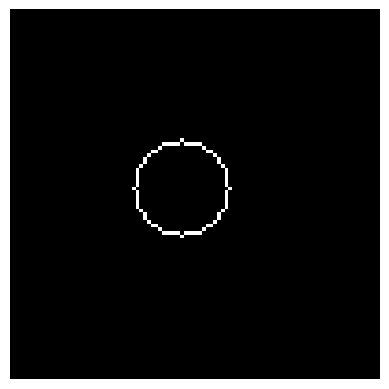

In [7]:
d_check,rec_check=True,'I0'

if d_check:

    imagen = input_d[rec_check]['image']

    plt.imshow(imagen, cmap='gray')
    plt.axis('off')
    plt.show()


# CNN

### GENERATE TRAIN DATA

In [8]:
x_train,y_train,x_eval,y_eval=[],[],[],[]

for R_tr in input_d.keys():

    im_tr=input_d[R_tr]['image']
    x_train.append(im_tr)
    y_train.append(input_d[R_tr]['label'])

for R_eval in input_d.keys():

    im_eval=input_d[R_eval]['image']
    x_eval.append(im_eval)
    y_eval.append(input_d[R_eval]['label'])

X_train,Y_train = np.array(x_train),np.array(y_train)
X_eval,Y_eval = np.array(x_eval),np.array(y_eval)

print('Train data len:',len(Y_train))
print('Evaluation data len:',len(Y_eval))

Train data len: 1000
Evaluation data len: 1000


 Train data shape: (1000, 100, 100)


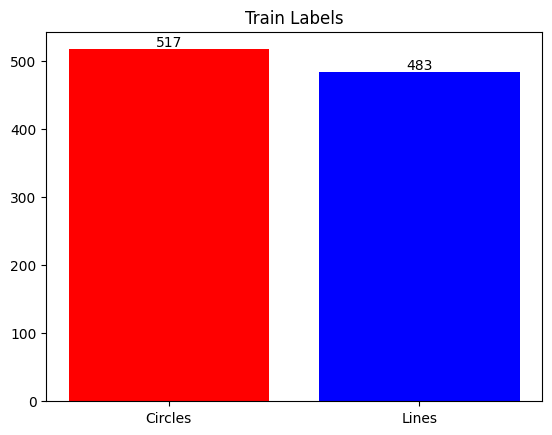

In [9]:
# check data
zeros_count = np.sum(Y_train == 0)
ones_count = np.sum(Y_train == 1)

labels = ['Circles', 'Lines']
counts = [zeros_count, ones_count]
print(' Train data shape:', np.shape(X_train))

plt.bar(labels, counts, color=['red', 'blue'])

for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Train Labels')
plt.show()

### GENERATE MODEL

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(height, wide)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 11ms/step - loss: 16.6896 - accuracy: 0.5990
Epoch 2/5
32/32 [==============================] - 0s 10ms/step - loss: 2.0994 - accuracy: 0.9230
Epoch 3/5
32/32 [==============================] - 0s 10ms/step - loss: 0.4901 - accuracy: 0.9760
Epoch 4/5
32/32 [==============================] - 0s 11ms/step - loss: 0.0805 - accuracy: 0.9910
Epoch 5/5
32/32 [==============================] - 0s 11ms/step - loss: 0.1687 - accuracy: 0.9890


In [13]:
model.evaluate(X_eval,Y_eval)

32/32 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9960


[0.06811291724443436, 0.9959999918937683]